In [7]:
using Primes
using PyPlot
using AMD

In [2]:
function initialize(n, pₙ)
    d = primes(pₙ)
    Aₙ = spdiagm(d, 0)
    e = ones(n, 1)

    for k in 2.^( 0:floor(Int,log2(n)))
        eₖ = e[1:(n-k)]
        Aₙ = Aₙ + spdiagm( [eₖ,eₖ], [-k k])       
    end
    
    Aₙ
end

n = 2000 #20000
pₙ = 17389 #224737

Aₙ = initialize(n, pₙ)
b = zeros(n); b[1] = 1


1

In [3]:
function solve_chol_AMD(Aₙ,b) #Julia Interne Aprox Minimal Degree Permutation
    F = cholfact(Aₙ)
    x = F \ b
    return x[1]
end

solve_chol_AMD (generic function with 1 method)

In [9]:
@time p = amd(Aₙ)
@time F = cholfact(Aₙ, perm=p)
@time F \ b;

  0.063100 seconds (2.45 k allocations: 1003.164 KB)
  0.411163 seconds (64 allocations: 24.406 MB, 0.53% gc time)
  0.002044 seconds (16 allocations: 70.945 KB)


Permutierte Matrix AₙNicht-Null Einträge Prozentual: 

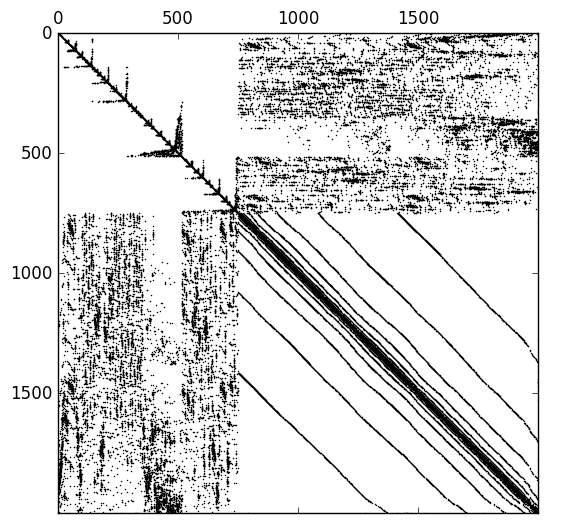

1.04765%

In [7]:
print("Permutierte Matrix Aₙ")
spy(Aₙ[p₂,p₂], markersize = 0.5) 
print("Nicht-Null Einträge Prozentual: ", nnz(Aₙ)/length(full(Aₙ))*100, "%") 

L-matrix der Cholesky ZerlegungFülle der unteren Diagonale: 

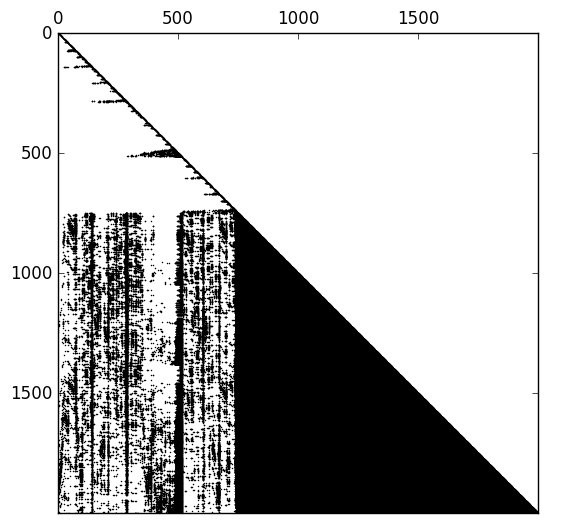

49.39715%

In [8]:
print("L-matrix der Cholesky Zerlegung")
spy(L₂, markersize = 0.5) 
print("Fülle der unteren Diagonale: ", 2*nnz(L₂)/length(full(L₂))*100, "%") 

##### Vergleich ohne Permutation

In [9]:
Fₒ = cholfact(Aₙ, perm=1:size(Aₙ,1))
pₒ = Fₒ[:p]
Lₒ = sparse(Fₒ[:L]);

L-Matrix der unpermutierten Cholesky ZerlegungFülle der unteren Diagonale: 

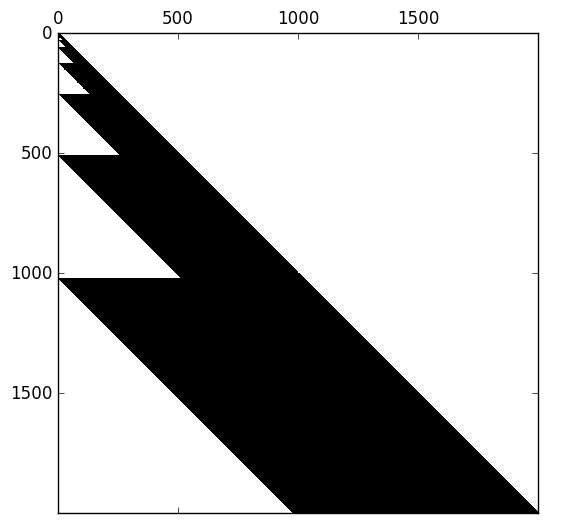

71.4939%

In [10]:
print("L-Matrix der unpermutierten Cholesky Zerlegung")
spy(Lₒ)
print("Fülle der unteren Diagonale: ", 2*nnz(Lₒ)/length(full(Lₒ))*100, "%") #Deutlicher Fill-IN